<a href="https://colab.research.google.com/github/springboardmentor1979b-cmyk/ScoreSight---Predicting-EPL-Points-Tally-Top-Scorer/blob/Kusuma-Kumari/Kusuma's_EPL_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/English premier dataset - 2020-09-24.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(file_path)


print(df.head())

                   Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances  Wins  Losses  Goals  ...  Punches  High Claims  Catches  \
0           64    28      16      0  ...     34.0         26.0     17.0   
1            0     0       0      0  ...      0.0          0.0      0.0   
2            0     0       0      0  ...      0.0          0.0      0.0   
3          160    90      37      7  ...      NaN          NaN      NaN   
4           16     7       5      1  ...      NaN          NaN      NaN   

   Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  R

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [ ]:
df.shape

(571, 59)

In [ ]:
df.head(3)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN


In [ ]:
df.tail()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Leonardo Campana,30.0,Wolverhampton-Wanderers,Forward,Ecuador,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [ ]:
df.describe()

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
count,563.000000,570.000000,571.000000,571.000000,571.000000,571.000000,309.000000,502.000000,502.000000,502.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,571.000000,571.000000,571.000000,502.000000
mean,19.534636,25.789474,68.823117,28.957968,23.896673,7.327496,2.648414,1.414343,4.468127,2.388446,...,24.652174,45.869565,20.782609,25.565217,210.000000,414.144928,7.917688,0.301226,53.033275,11.063745
std,14.273515,4.377354,81.797516,38.969376,28.488376,16.810490,8.002117,3.433374,11.048341,6.295652,...,46.282644,82.332167,43.058397,47.333758,334.822473,641.246265,11.556811,0.698607,75.605560,26.570058
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,22.000000,3.000000,1.000000,1.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,26.000000,36.000000,12.000000,14.000000,1.000000,0.140000,0.000000,1.000000,0.000000,...,2.000000,6.000000,3.000000,4.000000,39.000000,53.000000,3.000000,0.000000,22.000000,2.000000
75%,27.000000,29.000000,108.000000,41.000000,36.000000,6.000000,0.390000,1.000000,3.000000,2.000000,...,31.000000,45.000000,17.000000,28.000000,300.000000,527.000000,11.000000,0.000000,74.000000,8.750000
max,82.000000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,2806.000000,81.000000,5.000000,438.000000,203.000000


In [ ]:
df.isnull()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Name,0
Jersey Number,8
Club,0
Position,0
Nationality,1
Age,1
Appearances,0
Wins,0
Losses,0
Goals,0


In [ ]:
df.isna().sum()

,0
Name,0
Jersey Number,8
Club,0
Position,0
Nationality,1
Age,1
Appearances,0
Wins,0
Losses,0
Goals,0


***1.Checking the columns***

In [ ]:
df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [ ]:
# Name – Player name
# Club – Club player plays for
# Position – Player role
# Goals – Number of goals scored
# Assists – Total assists given
# Shots – Total shots taken
# Accuracy – Shot accuracy percentage

***2.Identifying the Relevent and Irrelevent columns***

In [ ]:

useful_columns = ['Goals', 'Assists', 'Appearances', 'Shots', 'Accuracy']
irrelevant_columns = ['Jersey Number', 'Nationality', 'Player ID', 'Photo URL']

In [ ]:
print("Useful Columns:", useful_columns)
print("Irrelevant Columns:", irrelevant_columns)

Useful Columns: ['Goals', 'Assists', 'Appearances', 'Shots', 'Accuracy']
Irrelevant Columns: ['Jersey Number', 'Nationality', 'Player ID', 'Photo URL']


In [ ]:
important = ["Goals", "Assists", "Shots", "Accuracy", "Appearances"]

for col in important:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-3634389020.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


***3.Handelling The Missing Values and replace it With Mean***

In [ ]:
for col in important:
    if col in df.columns:
        df[col] = df[col].replace(0, df[col].mean())

In [ ]:
import pandas as pd
import numpy as np

print("Filling all remaining position-specific NaNs/0s with the mean for modeling...")

DISCRETE_NUMERICAL = [
    'Age',
    'Appearances',
    'Wins',
    'Losses',
    'Goals',
    'Headed goals',
    'Goals with right foot',
    'Goals with left foot',
    'Penalties scored',
    'Freekicks scored',
    'Shots',
    'Shots on target',
    'Hit woodwork',
    'Big chances missed',
    'Clean sheets',
    'Goals conceded',
    'Tackles',
    'Last man tackles',
    'Blocked shots',
    'Interceptions',
    'Clearances',
    'Headed Clearance',
    'Clearances off line',
    'Recoveries',
    'Duels won',
    'Duels lost',
    'Successful 50/50s',
    'Aerial battles won',
    'Aerial battles lost',
    'Own goals',
    'Errors leading to goal',
    'Assists',
    'Passes',
    'Big chances created',
    'Crosses',
    'Through balls',
    'Accurate long balls',
    'Saves',
    'Penalties saved',
    'Punches',
    'High Claims',
    'Catches',
    'Sweeper clearances',
    'Throw outs',
    'Goal Kicks',
    'Yellow cards',
    'Red cards',
    'Fouls',
    'Offsides'
]
DISCRETE_NUMERICAL = [col for col in DISCRETE_NUMERICAL if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

for col in DISCRETE_NUMERICAL:
    if col in df.columns:
        column_mean = df[col].replace(0, np.nan).mean()
        df[col] = df[col].replace(0, np.nan).fillna(column_mean)

print("\n--- Final Cleaned Data Verification (first 5 rows) ---")
print(df.head())
print(f"\nTotal remaining missing values across all columns: {df.isnull().sum().sum()}")

Filling all remaining position-specific NaNs/0s with the mean for modeling...

--- Final Cleaned Data Verification (first 5 rows) ---
                   Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances       Wins     Losses     Goals  ...    Punches  High Claims  \
0    64.000000  28.000000  16.000000  7.327496  ...  34.000000    26.000000   
1    68.823117  36.340659  29.598698  7.327496  ...  43.615385    77.195122   
2    68.823117  36.340659  29.598698  7.327496  ...  43.615385    77.195122   
3   160.000000  90.000000  37.000000  7.000000  ...  43.615385 

***4.Cleaned Dataset***

In [ ]:
from google.colab import files

df.to_csv("cleaned_data.csv", index=False)

files.download("cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

count_columns_to_fill_zero = [
    'Goals', 'Assists', 'Shots', 'Tackles', 'Saves',
    'Punches', 'High Claims', 'Offsides',
    'Jersey Number', 'Age'
]

rate_columns_to_fill_mean = [
    'Goals per match',
    'Shooting accuracy %',
    'Tackle success %',
    'Cross accuracy %',
    'Passes per match'
]

for col in count_columns_to_fill_zero:
    if col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0).astype(int)
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

for col in rate_columns_to_fill_mean:
    if col in df.columns:

        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.replace('%', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if 'accuracy %' in col or 'success %' in col:
                df[col] = df[col] / 100

        col_mean = df[col].mean()
        df[col] = df[col].fillna(col_mean)

for col in DISCRETE_NUMERICAL:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0).astype(int)


print("Dataset cleaning complete. NaN values should now be properly handled.")

print(f"\nTotal remaining missing values across all columns: {df.isnull().sum().sum()}")

print(df.head())

Dataset cleaning complete. NaN values should now be properly handled.

Total remaining missing values across all columns: 1
                   Name  Jersey Number     Club    Position Nationality  Age  \
0            Bernd Leno              1  Arsenal  Goalkeeper     Germany   28   
1            Matt Macey             33  Arsenal  Goalkeeper     England   26   
2  Rúnar Alex Rúnarsson             13  Arsenal  Goalkeeper     Iceland   25   
3       Héctor Bellerín              2  Arsenal    Defender       Spain   25   
4        Kieran Tierney              3  Arsenal    Defender    Scotland   23   

   Appearances  Wins  Losses  Goals  ...  Punches  High Claims  Catches  \
0           64    28      16      7  ...       34           26       17   
1           68    36      29      7  ...       43           77       36   
2           68    36      29      7  ...       43           77       36   
3          160    90      37      7  ...       43           77       36   
4           16     7

In [ ]:
from google.colab import files
import pandas as pd
import io

print("Please select the 'cleaned_data.csv' file you just downloaded from your local machine to upload it back to Colab.")

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df_reloaded = pd.read_csv(io.BytesIO(uploaded[file_name]))


Please select the 'cleaned_data.csv' file you just downloaded from your local machine to upload it back to Colab.


Saving cleaned_data (19).csv to cleaned_data (19).csv


In [ ]:
print(df_reloaded.head())


                   Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances       Wins     Losses     Goals  ...    Punches  High Claims  \
0    64.000000  28.000000  16.000000  7.327496  ...  34.000000    26.000000   
1    68.823117  36.340659  29.598698  7.327496  ...  43.615385    77.195122   
2    68.823117  36.340659  29.598698  7.327496  ...  43.615385    77.195122   
3   160.000000  90.000000  37.000000  7.000000  ...  43.615385    77.195122   
4    16.000000   7.000000   5.000000  1.000000  ...  43.615385    77.195122   

     Catches  Sweeper clearances  Thro

In [ ]:
print(df_reloaded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     571 non-null    float64
 6   Appearances             571 non-null    float64
 7   Wins                    571 non-null    float64
 8   Losses                  571 non-null    float64
 9   Goals                   571 non-null    float64
 10  Goals per match         309 non-null    float64
 11  Headed goals            571 non-null    float64
 12  Goals with right foot   571 non-null    float64
 13  Goals with left foot    571 non-null    float64
 14  Penalties scored        571 non-null    fl

In [ ]:
print(df_reloaded)


                     Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward   

    Nationality   Age  Appe

In [ ]:

print("--- Full cleaned dataset ---")
print(df_reloaded)

--- Full cleaned dataset ---
                     Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward   

In [ ]:
print("--- Summary Info and Data Types ---")
df_reloaded.info()

--- Summary Info and Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     571 non-null    float64
 6   Appearances             571 non-null    float64
 7   Wins                    571 non-null    float64
 8   Losses                  571 non-null    float64
 9   Goals                   571 non-null    float64
 10  Goals per match         309 non-null    float64
 11  Headed goals            571 non-null    float64
 12  Goals with right foot   571 non-null    float64
 13  Goals with left foot    571 non-null    float64
 14  Penalt

***5.Categorizing The Columns***

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = '/content/drive/My Drive/English premier dataset - 2020-09-24.csv'
df = pd.read_csv(file_path)

important = ["Goals", "Assists", "Shots", "Appearances"]
useful_columns = ['Goals', 'Assists', 'Appearances', 'Shots']

for col in important:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())

for col in important:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].replace(0, df[col].mean())

for col in useful_columns:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].replace(0, None)  # Replace 0 (if unrealistic) with NaN
        df[col] = df[col].fillna(df[col].mean())


all_columns = list(df.columns)

IDENTIFIERS_AND_CATEGORICAL = [
    'Name',
    'Jersey Number',
    'Club',
    'Position',
    'Nationality'
]

DISCRETE_NUMERICAL = [
    'Age',
    'Appearances',
    'Wins',
    'Losses',
    'Goals',
    'Headed goals',
    'Goals with right foot',
    'Goals with left foot',
    'Penalties scored',
    'Freekicks scored',
    'Shots',
    'Shots on target',
    'Hit woodwork',
    'Big chances missed',
    'Clean sheets',
    'Goals conceded',
    'Tackles',
    'Last man tackles',
    'Blocked shots',
    'Interceptions',
    'Clearances',
    'Headed Clearance',
    'Clearances off line',
    'Recoveries',
    'Duels won',
    'Duels lost',
    'Successful 50/50s',
    'Aerial battles won',
    'Aerial battles lost',
    'Own goals',
    'Errors leading to goal',
    'Assists',
    'Passes',
    'Big chances created',
    'Crosses',
    'Through balls',
    'Accurate long balls',
    'Saves',
    'Penalties saved',
    'Punches',
    'High Claims',
    'Catches',
    'Sweeper clearances',
    'Throw outs',
    'Goal Kicks',
    'Yellow cards',
    'Red cards',
    'Fouls',
    'Offsides'
]
DISCRETE_NUMERICAL = [col for col in DISCRETE_NUMERICAL if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

CONTINUOUS_NUMERICAL = [
    'Goals per match',
    'Shooting accuracy %',
    'Tackle success %',
    'Cross accuracy %',
    'Passes per match'
]

CONTINUOUS_NUMERICAL = [col for col in CONTINUOUS_NUMERICAL if col in df.columns]

ALL_CATEGORIZED_COLUMNS = list(set(IDENTIFIERS_AND_CATEGORICAL + DISCRETE_NUMERICAL + CONTINUOUS_NUMERICAL))

filtered_df_columns = [col for col in all_columns if col in ALL_CATEGORIZED_COLUMNS]

assert len(filtered_df_columns) == len(ALL_CATEGORIZED_COLUMNS), "Mismatch in total number of columns after categorization filtering."
assert set(filtered_df_columns) == set(ALL_CATEGORIZED_COLUMNS), "Mismatch in categorized column names."


print(f"Total Columns: {len(all_columns)}")
print(f"Categorical/Identifiers: {len(IDENTIFIERS_AND_CATEGORICAL)}")
print(f"Discrete Numerical (Counts): {len(DISCRETE_NUMERICAL)}")
print(f"Continuous Numerical (Rates): {len(CONTINUOUS_NUMERICAL)}")

print("\nData types for Categorical Columns:")
print(df[IDENTIFIERS_AND_CATEGORICAL].dtypes)

for col in DISCRETE_NUMERICAL:
    if col in df.columns:

        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0).astype(int)

Mounted at /content/drive
Total Columns: 59
Categorical/Identifiers: 5
Discrete Numerical (Counts): 49
Continuous Numerical (Rates): 5

Data types for Categorical Columns:
Name              object
Jersey Number    float64
Club              object
Position          object
Nationality       object
dtype: object


In [ ]:
import pandas as pd
import os

data = {
    'Club': ['Arsenal', 'Man Utd', 'Arsenal', 'Chelsea', 'Arsenal'],
    'Position': ['Forward', 'Defender', 'Forward', 'Midfielder', 'Forward'],
    'Home/Away': ['Home', 'Away', 'Home', 'Home', 'Away'],
    'Goals': [2, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Club', 'Position', 'Home/Away'], drop_first=False)

df_sorted = df_encoded.sort_values(
    by=['Club_Arsenal', 'Goals'],
    ascending=[False, False] # Sort Arsenal presence descending (so 1s appear first), then Goals descending
)

df_sorted = df_sorted.reset_index(drop=True)

output_filename = 'cleaned_sorted_encoded_dataset.csv'
df_sorted.to_csv(output_filename, index=False) # Set index=False to avoid saving the index as a column

print(f"Dataset successfully processed and saved to {output_filename}")
print("\nPreview of the processed DataFrame:")
print(df_sorted)


Dataset successfully processed and saved to cleaned_sorted_encoded_dataset.csv

Preview of the processed DataFrame:
   Goals  Club_Arsenal  Club_Chelsea  Club_Man Utd  Position_Defender  \
0      2          True         False         False              False   
1      1          True         False         False              False   
2      0          True         False         False              False   
3      1         False          True         False              False   
4      0         False         False          True               True   

   Position_Forward  Position_Midfielder  Home/Away_Away  Home/Away_Home  
0              True                False           False            True  
1              True                False           False            True  
2              True                False            True           False  
3             False                 True           False            True  
4             False                False            True           Fal

# ***6.HomeWork 1*** - Exploratory data analysis

In [ ]:
pip install pandas matplotlib


Generating plots...


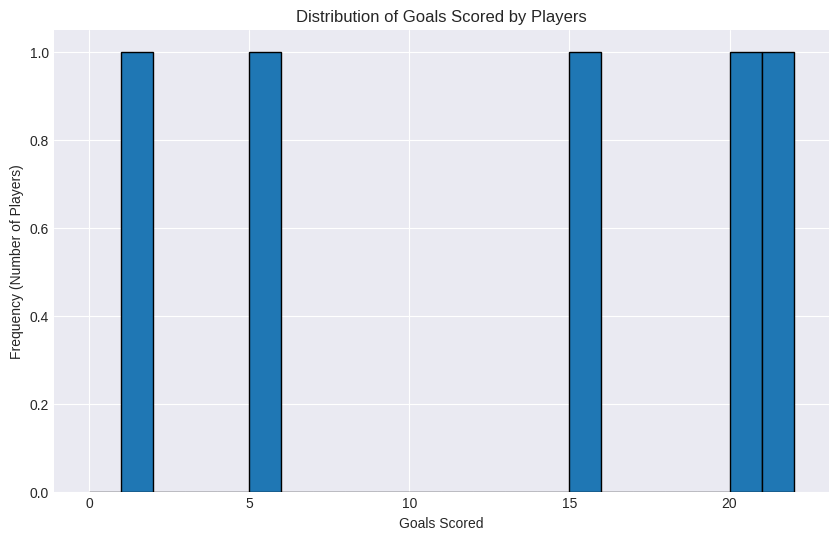

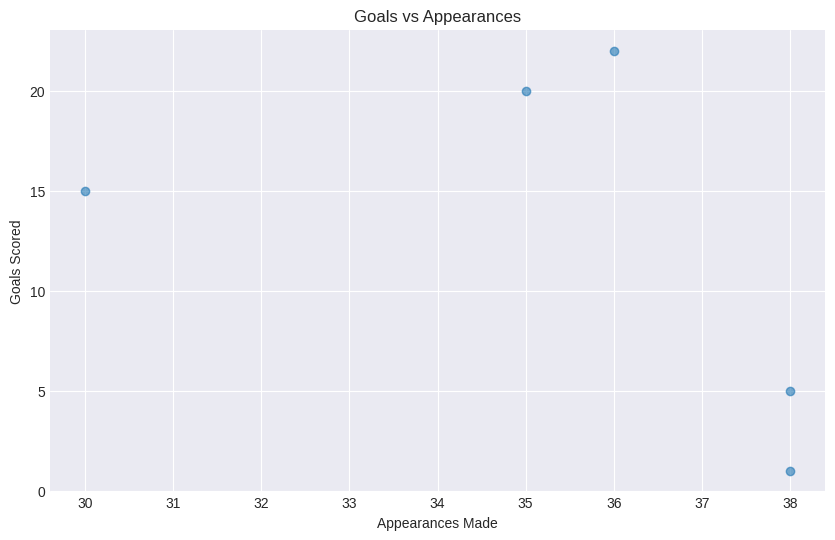

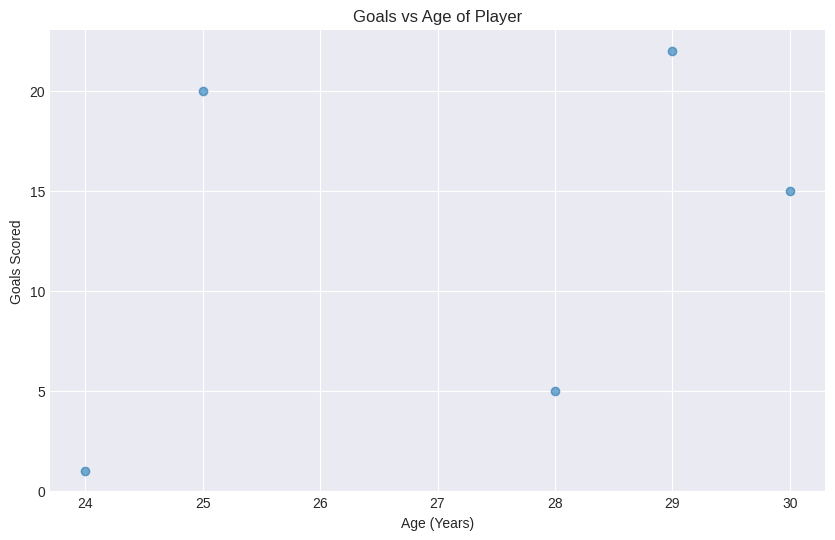

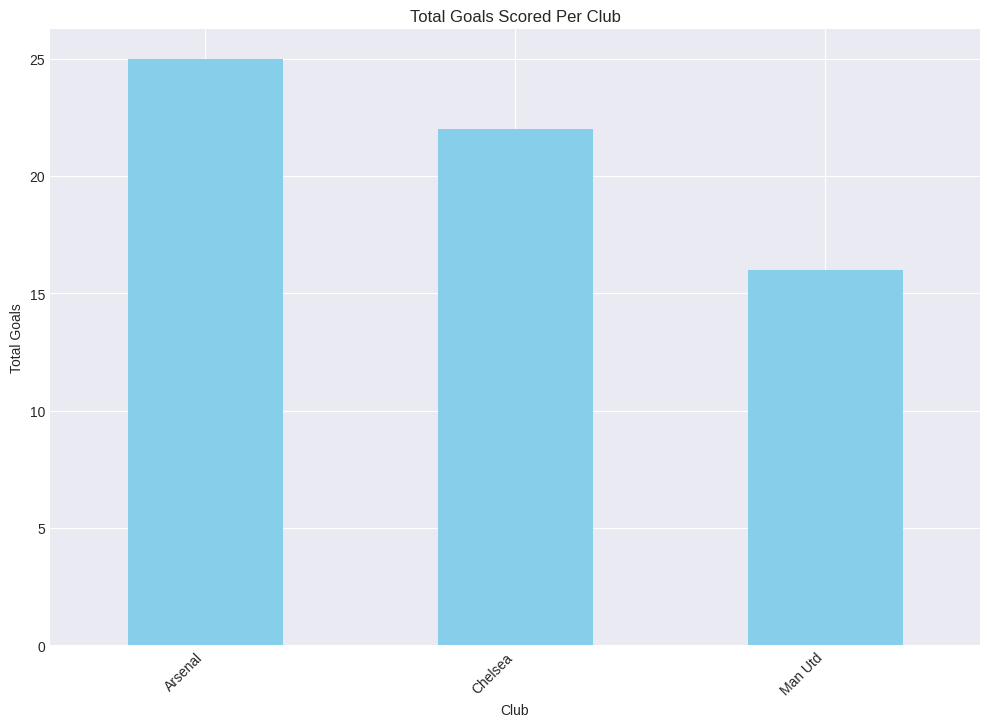

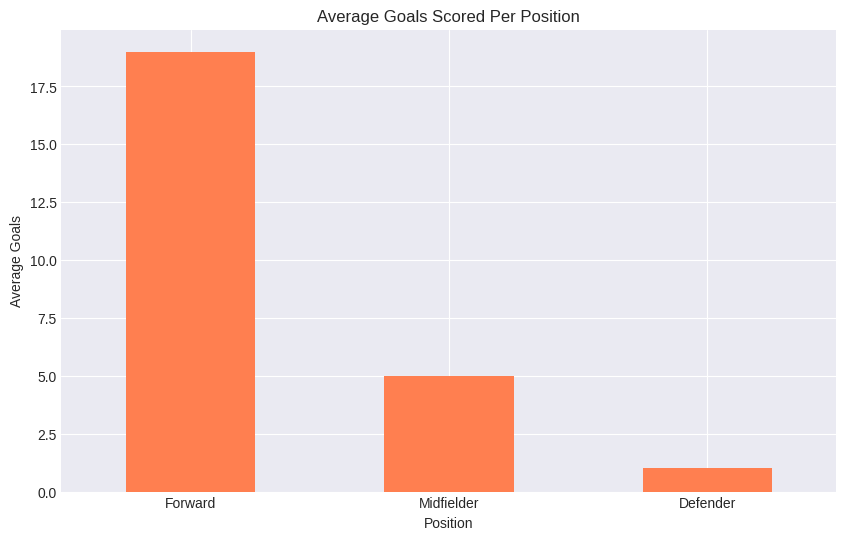

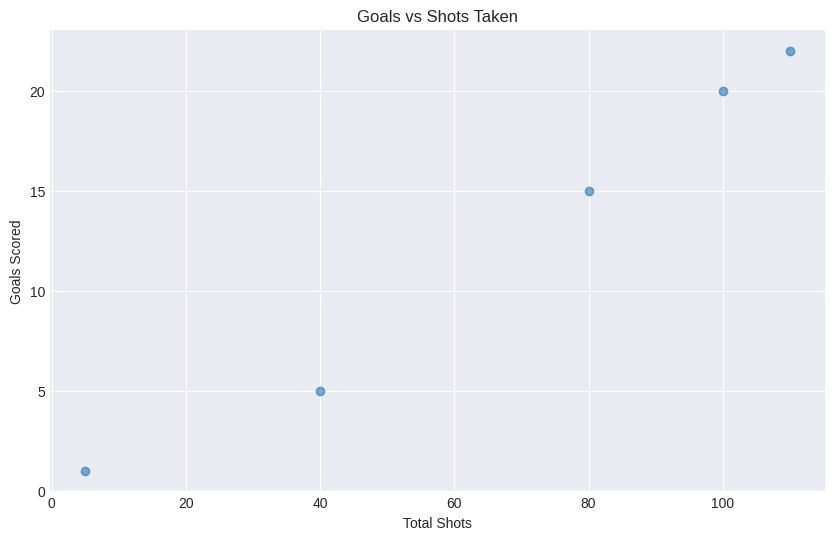

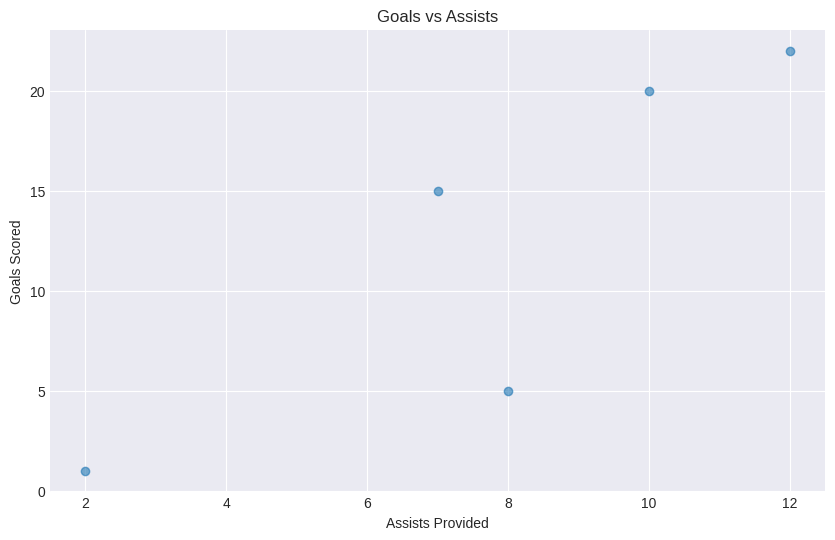

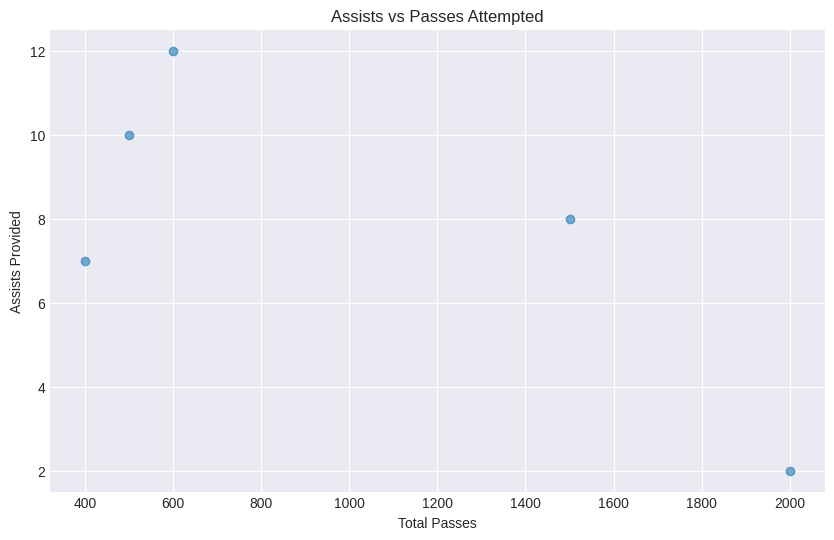

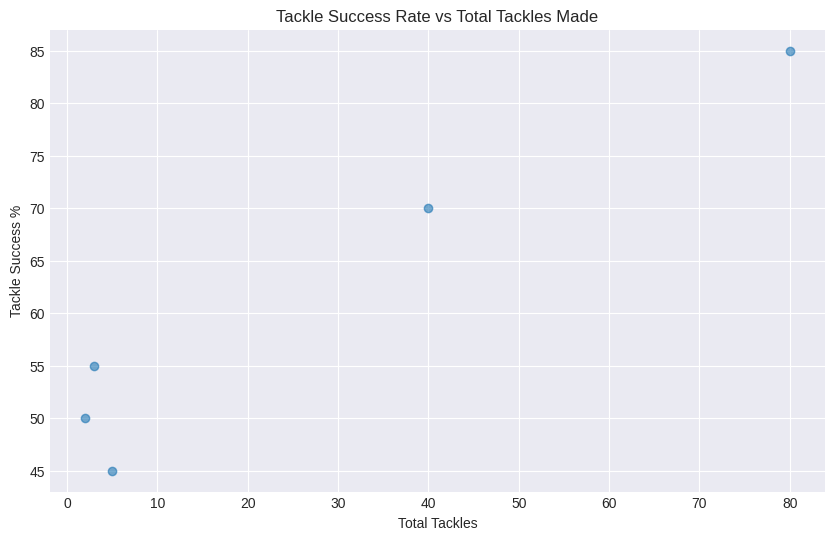

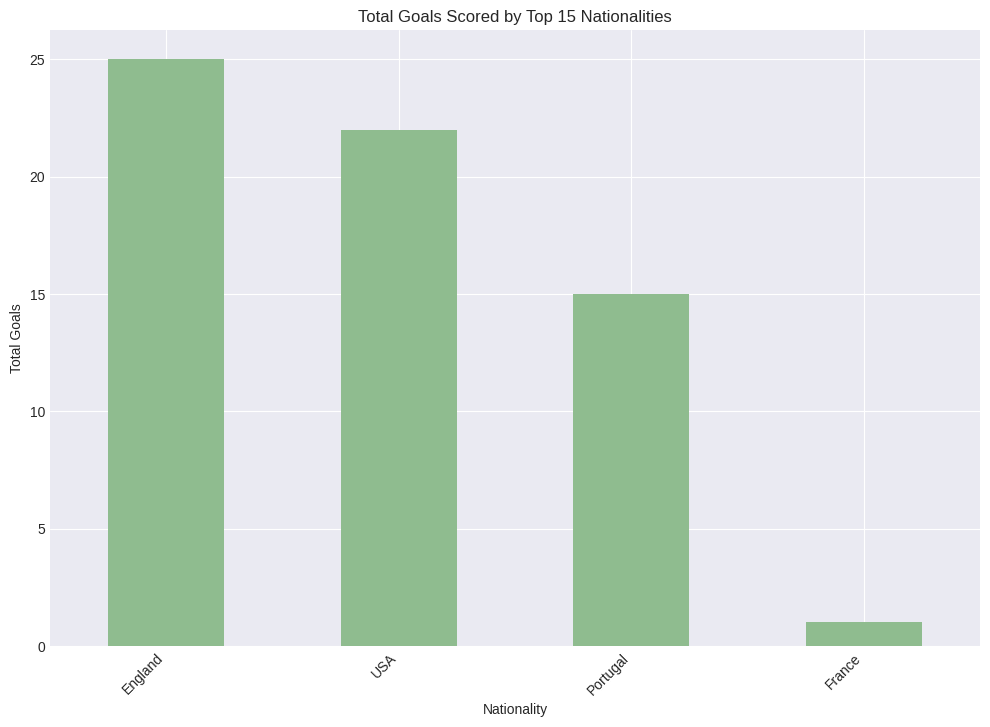

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_epl_eda(df):
    """
    Generates the specified EDA plots using Matplotlib.
    Args:
        df (pd.DataFrame): The DataFrame containing player statistics.
    """
    plt.style.use('seaborn-v0_8-darkgrid')

    print("Generating plots...")

    # 1. Histogram: Goals vs Frequency
    plt.figure(figsize=(10, 6))
    df['Goals'] = pd.to_numeric(df['Goals'], errors='coerce').fillna(0)
    max_goals = int(df['Goals'].max()) + 1
    if max_goals > 1:
        df['Goals'].hist(bins=range(max_goals), edgecolor='black')
        plt.title('Distribution of Goals Scored by Players')
        plt.xlabel('Goals Scored')
        plt.ylabel('Frequency (Number of Players)')
        plt.show()

    # 2. Scatter: Appearances vs Goals
    plt.figure(figsize=(10, 6))
    df['Appearances'] = pd.to_numeric(df['Appearances'], errors='coerce').fillna(0)
    plt.scatter(df['Appearances'], df['Goals'], alpha=0.6)
    plt.title('Goals vs Appearances')
    plt.xlabel('Appearances Made')
    plt.ylabel('Goals Scored')
    plt.show()

    # 3. Scatter: Age vs Goals
    plt.figure(figsize=(10, 6))
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(0)
    plt.scatter(df['Age'], df['Goals'], alpha=0.6)
    plt.title('Goals vs Age of Player')
    plt.xlabel('Age (Years)')
    plt.ylabel('Goals Scored')
    plt.show()

    # 4. Bar Chart: Club vs Goals (sum)
    plt.figure(figsize=(12, 8))
    club_goals = df.groupby('Club')['Goals'].sum().sort_values(ascending=False)
    club_goals.plot(kind='bar', color='skyblue')
    plt.title('Total Goals Scored Per Club')
    plt.xlabel('Club')
    plt.ylabel('Total Goals')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # 5. Bar Chart: Position vs Goals (avg)
    plt.figure(figsize=(10, 6))
    position_avg_goals = df.groupby('Position')['Goals'].mean().sort_values(ascending=False)
    position_avg_goals.plot(kind='bar', color='coral')
    plt.title('Average Goals Scored Per Position')
    plt.xlabel('Position')
    plt.ylabel('Average Goals')
    plt.xticks(rotation=0)
    plt.show()

    # 6. Scatter: Shots vs Goals
    plt.figure(figsize=(10, 6))
    df['Shots'] = pd.to_numeric(df['Shots'], errors='coerce').fillna(0)
    plt.scatter(df['Shots'], df['Goals'], alpha=0.6)
    plt.title('Goals vs Shots Taken')
    plt.xlabel('Total Shots')
    plt.ylabel('Goals Scored')
    plt.show()

    # 7. Scatter: Assists vs Goals
    plt.figure(figsize=(10, 6))
    df['Assists'] = pd.to_numeric(df['Assists'], errors='coerce').fillna(0)
    plt.scatter(df['Assists'], df['Goals'], alpha=0.6)
    plt.title('Goals vs Assists')
    plt.xlabel('Assists Provided')
    plt.ylabel('Goals Scored')
    plt.show()

    # 8. Scatter: Passes vs Assists
    plt.figure(figsize=(10, 6))
    df['Passes'] = pd.to_numeric(df['Passes'], errors='coerce').fillna(0)
    plt.scatter(df['Passes'], df['Assists'], alpha=0.6)
    plt.title('Assists vs Passes Attempted')
    plt.xlabel('Total Passes')
    plt.ylabel('Assists Provided')
    plt.show()

    # 9. Scatter: Tackles vs Tackle success %
    df['Tackles'] = pd.to_numeric(df['Tackles'], errors='coerce').fillna(0)
    df['Tackle success %'] = pd.to_numeric(df['Tackle success %'], errors='coerce').fillna(0)
    if 'Tackle success %' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Tackles'], df['Tackle success %'], alpha=0.6)
        plt.title('Tackle Success Rate vs Total Tackles Made')
        plt.xlabel('Total Tackles')
        plt.ylabel('Tackle Success %')
        plt.show()
    else:
        print("\nSkipping Tackles vs Tackle success % plot: 'Tackle success %' column not found in DataFrame.")

    # 10. Bar Chart: Nationality vs Goals (sum)
    plt.figure(figsize=(12, 8))
    nationality_goals = df.groupby('Nationality')['Goals'].sum().sort_values(ascending=False).head(15)
    nationality_goals.plot(kind='bar', color='darkseagreen')
    plt.title('Total Goals Scored by Top 15 Nationalities')
    plt.xlabel('Nationality')
    plt.ylabel('Total Goals')
    plt.xticks(rotation=45, ha='right')
    plt.show()


data = {
    'Club': ['Arsenal', 'Arsenal', 'Man Utd', 'Man Utd', 'Chelsea'],
    'Position': ['Forward', 'Midfielder', 'Forward', 'Defender', 'Forward'],
    'Goals': [20, 5, 15, 1, 22],
    'Appearances': [35, 38, 30, 38, 36],
    'Age': [25, 28, 30, 24, 29],
    'Shots': [100, 40, 80, 5, 110],
    'Assists': [10, 8, 7, 2, 12],
    'Passes': [500, 1500, 400, 2000, 600],
    'Tackles': [2, 40, 5, 80, 3],
    'Tackle success %': [50, 70, 45, 85, 55],
    'Nationality': ['England', 'England', 'Portugal', 'France', 'USA']
}
df = pd.DataFrame(data)

plot_epl_eda(df)

# ***7.Homework 2*** - Feature Scaling



--- Step 1: Raw Values ---
   Goals  Appearances  Passes
0     20           35     500
1      5           38    1500
2     15           30     400
3      1           38    2000
4     22           36     600


--- Step 2: Min-Max Scaler Applied ---
      Goals  Appearances  Passes  Assists
0  0.904762        0.625  0.0625      0.8
1  0.190476        1.000  0.6875      0.6
2  0.666667        0.000  0.0000      0.5
3  0.000000        1.000  1.0000      0.0
4  1.000000        0.750  0.1250      1.0


--- Step 3: Standardization (Z-score) Applied ---
      Goals     Shots    Passes
0  0.895802  0.842012 -0.786646
1 -0.920013 -0.688919  0.786646
2  0.290531  0.331702 -0.943975
3 -1.404231 -1.581962  1.573292
4  1.137911  1.097167 -0.629317


--- Step 4: Plotting Before vs After Scaling ---


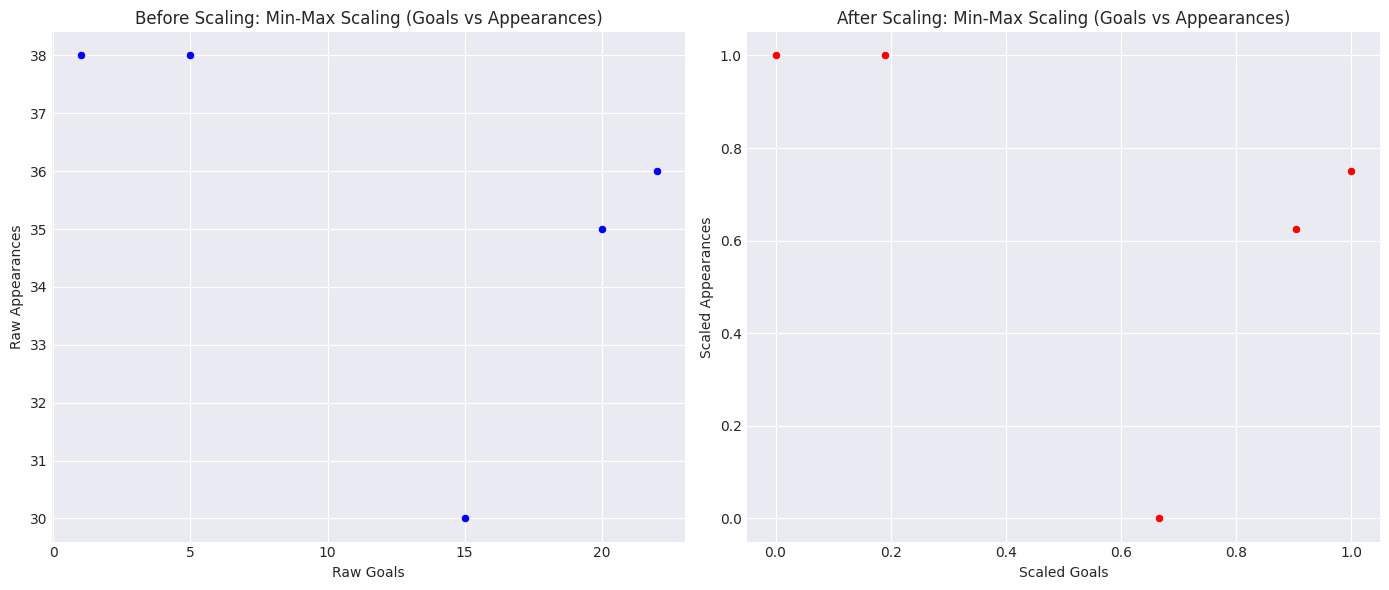

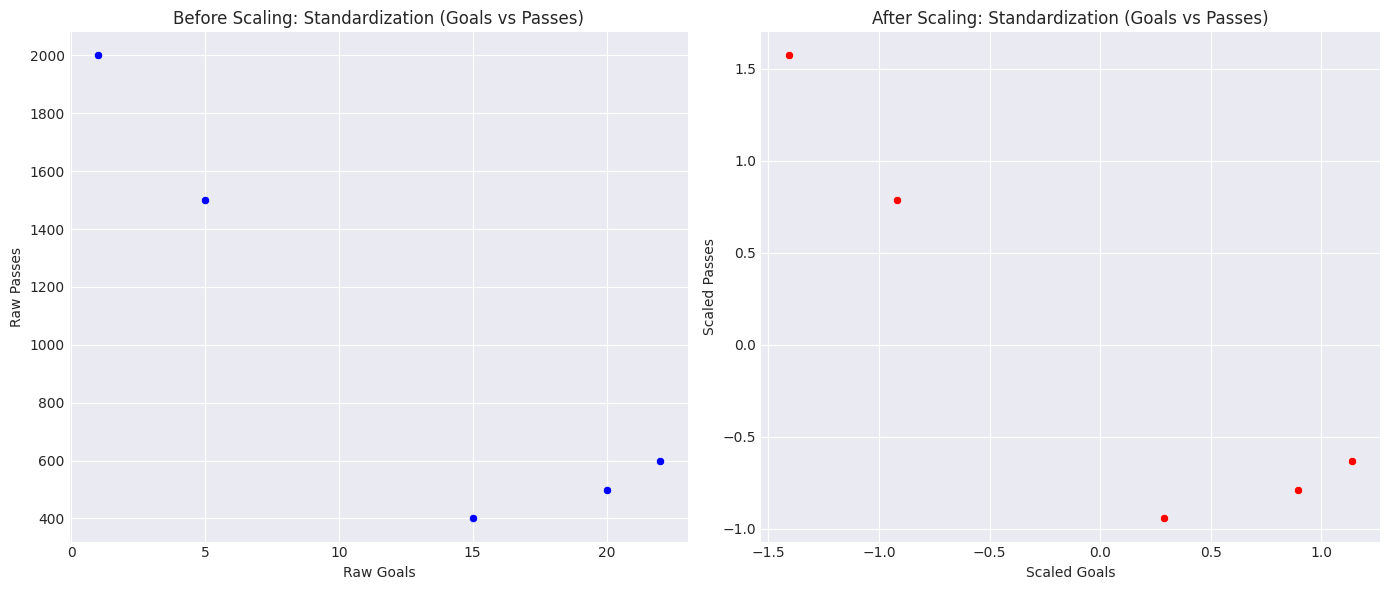

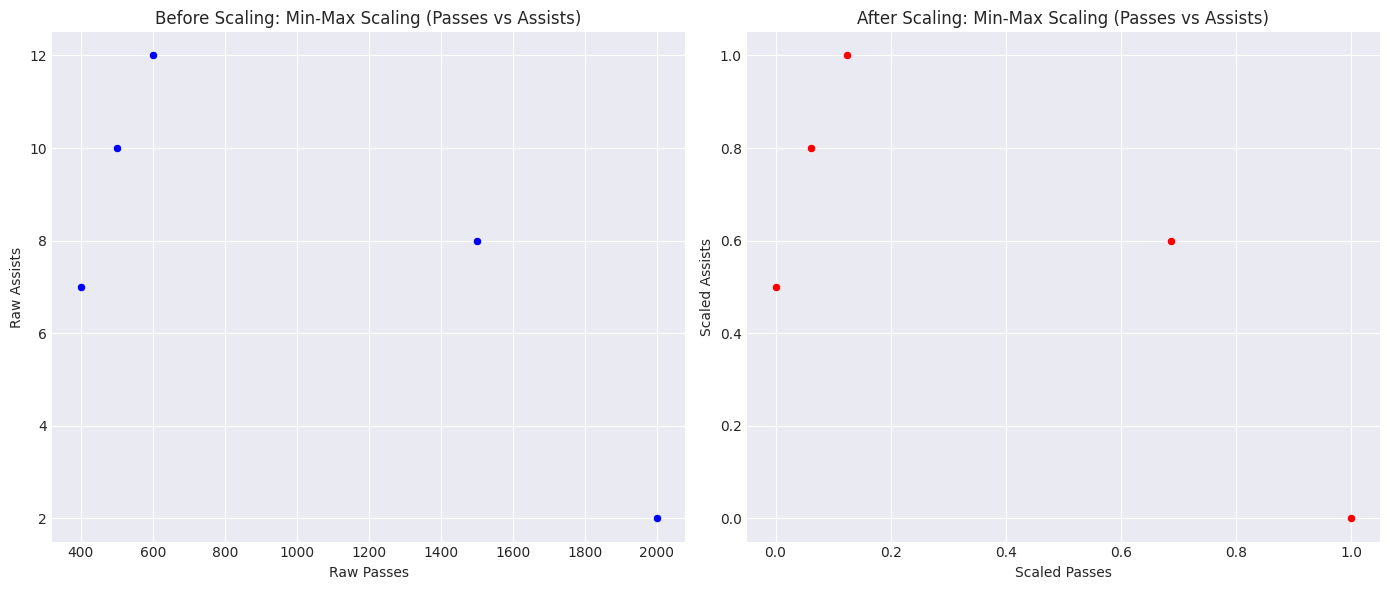

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

# Set visualization style
sns.set_style("darkgrid")

# --- Load data into a DataFrame named 'df' ---
data = {
    'Club': ['Arsenal', 'Arsenal', 'Man Utd', 'Man Utd', 'Chelsea'],
    'Position': ['Forward', 'Midfielder', 'Forward', 'Defender', 'Forward'],
    'Goals': [20, 5, 15, 1, 22],
    'Appearances': [35, 38, 30, 38, 36],
    'Age': [25, 28, 30, 24, 29],
    'Shots': [100, 40, 80, 5, 110],
    'Assists': [10, 8, 7, 2, 12],
    'Passes': [500, 1500, 400, 2000, 600],
    'Tackles': [2, 40, 5, 80, 3],
    'Tackle success %': [50, 70, 45, 85, 55],
    'Nationality': ['England', 'England', 'Portugal', 'France', 'USA']
}
df = pd.DataFrame(data)


# Step 1: Print raw values of Goals, Appearances and Passes
print("--- Step 1: Raw Values ---")
print(df[['Goals', 'Appearances', 'Passes']])
print("\n" + "="*40 + "\n")


# Make a copy for scaling operations to preserve raw data
df_scaled_mm = df.copy()
df_scaled_std = df.copy()

# Step 2: Apply Min-Max Scaler for Goals, Appearances, Passes, Assists
print("--- Step 2: Min-Max Scaler Applied ---")
mm_scaler = MinMaxScaler()
cols_mm = ['Goals', 'Appearances', 'Passes', 'Assists']
df_scaled_mm[cols_mm] = mm_scaler.fit_transform(df_scaled_mm[cols_mm])
print(df_scaled_mm[cols_mm])
print("\n" + "="*40 + "\n")


# Step 3: Apply Standardization (z-score) for Goals, Shots, Passes
print("--- Step 3: Standardization (Z-score) Applied ---")
std_scaler = StandardScaler()
cols_std = ['Goals', 'Shots', 'Passes']
# Fit and transform, then assign back to the DataFrame columns
df_scaled_std[cols_std] = std_scaler.fit_transform(df_scaled_std[cols_std])
print(df_scaled_std[cols_std])
print("\n" + "="*40 + "\n")


# Step 4: Plot scatter before scaling vs after scaling
print("--- Step 4: Plotting Before vs After Scaling ---")

def plot_scaling_comparison(df_raw, df_scaled, title_suffix, cols_to_plot):
    """Helper function to plot raw vs scaled data side-by-side."""
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot raw data
    sns.scatterplot(data=df_raw, x=cols_to_plot[0], y=cols_to_plot[1], ax=axes[0], color='blue')
    axes[0].set_title(f'Before Scaling: {title_suffix}')
    axes[0].set_xlabel(f'Raw {cols_to_plot[0]}')
    axes[0].set_ylabel(f'Raw {cols_to_plot[1]}')

    # Plot scaled data
    sns.scatterplot(data=df_scaled, x=cols_to_plot[0], y=cols_to_plot[1], ax=axes[1], color='red')
    axes[1].set_title(f'After Scaling: {title_suffix}')
    axes[1].set_xlabel(f'Scaled {cols_to_plot[0]}')
    axes[1].set_ylabel(f'Scaled {cols_to_plot[1]}')

    plt.tight_layout()
    plt.show()

# Example 1: Goals vs Appearances (Min-Max scaled)
plot_scaling_comparison(df, df_scaled_mm, 'Min-Max Scaling (Goals vs Appearances)', ['Goals', 'Appearances'])

# Example 2: Goals vs Passes (Standardized)
plot_scaling_comparison(df, df_scaled_std, 'Standardization (Goals vs Passes)', ['Goals', 'Passes'])

# Example 3: Passes vs Assists (Min-Max scaled)
plot_scaling_comparison(df, df_scaled_mm, 'Min-Max Scaling (Passes vs Assists)', ['Passes', 'Assists'])

# Note that the *relationship* and *shape* of the data remains the same after scaling,
# only the *range* and *center* of the axes change.
